#                           B-TECH PROJECT
# Machine Learning Enabled Chemiresistive Sensors for Multiple Gas Detection




In [ ]:
"""
# B.Tech Project - Machine Learning Enabled Chemiresistive Sensors for Multiple Gas Detection

This Jupyter Notebook contains the implementation of a machine learning-based gas detection system using chemiresistive sensors.
It includes data visualization, preprocessing, model training, and evaluation.

## Installing Dependencies
Ensure all required libraries are installed before running the notebook:
```bash
pip install matplotlib numpy pandas scikit-learn opencv-python seaborn
```
"""

### -->> Installing Dependencies
----

In [15]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### -->> Importing Dependencies Module
----

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
! pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


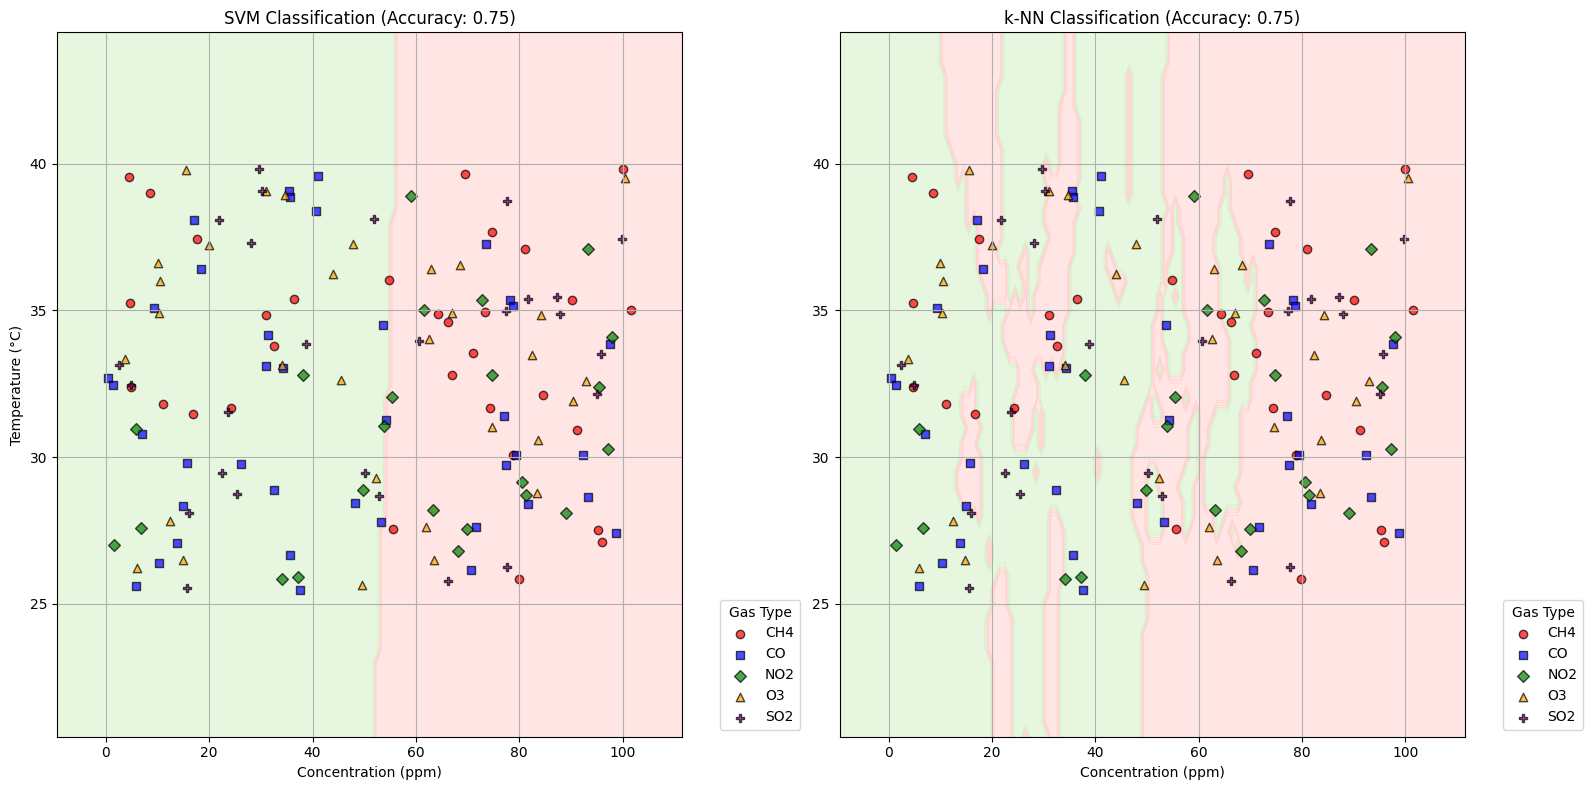

In [ ]:
# Code for the diffrent gases
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Step 1: Defined dataset with 5 gases and their thresholds
np.random.seed(42)
gases_info = {
    'CO': 9,    # Threshold in ppm
    'NO2': 53,
    'SO2': 75,
    'CH4': 10,
    'O3': 70
}

samples_per_gas = 100
data, labels, gas_names = [], [], []

# Generate data for each gas
for gas, threshold in gases_info.items():
    concentration = np.random.uniform(low=0, high=100, size=samples_per_gas)  # Gas levels in ppm
    temperature = np.random.uniform(low=25, high=40, size=samples_per_gas)  # Temperature in °C
    humidity = np.random.uniform(low=50, high=90, size=samples_per_gas)  # Humidity in %
    noise = np.random.normal(scale=2, size=samples_per_gas)  # Sensor noise

    # Features and labels
    features = np.column_stack((concentration + noise, temperature, humidity))
    label = (concentration > threshold).astype(int)  # 0: Safe, 1: Harmful

    data.append(features)
    labels.append(label)
    gas_names.extend([gas] * samples_per_gas)

data = np.vstack(data)
labels = np.hstack(labels)
gas_names = np.array(gas_names)

# Step 2: Splitting data
X_train, X_test, y_train, y_test, gas_train, gas_test = train_test_split(data, labels, gas_names, test_size=0.3, random_state=42)

# Step 3: Training SVM and k-NN models
svm_model = SVC(kernel='rbf', C=1, probability=True)
svm_model.fit(X_train[:, :2], y_train)  # Using only concentration and temperature for 2D visualization

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train[:, :2], y_train)  # Using only concentration and temperature

# Step 4: Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Generate a meshgrid for decision regions
x_min, x_max = X_test[:, 0].min() - 10, X_test[:, 0].max() + 10  # Concentration
y_min, y_max = X_test[:, 1].min() - 5, X_test[:, 1].max() + 5  # Temperature
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.5))

# Create a colormap for decision regions
region_cmap = ListedColormap(['#d0f0c0', '#ffcccb'])  # Light green for safe, pink for harmful

# Plotting SVM decision regions
Z_svm = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
axes[0].contourf(xx, yy, Z_svm, cmap=region_cmap, alpha=0.5)

# Plotting k-NN decision regions
Z_knn = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
axes[1].contourf(xx, yy, Z_knn, cmap=region_cmap, alpha=0.5)

# Gas-Specific Scatter Plots
unique_gases = np.unique(gas_test)
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 's', 'D', '^', 'P']
gas_color_map = {gas: (color, marker) for gas, color, marker in zip(unique_gases, colors, markers)}

# Plotting SVM data points
for gas in unique_gases:
    mask = gas_test == gas
    color, marker = gas_color_map[gas]
    axes[0].scatter(X_test[mask, 0], X_test[mask, 1], c=color, marker=marker, label=gas, edgecolor='k', alpha=0.7)

axes[0].set_title(f"SVM Classification (Accuracy: {accuracy_score(y_test, svm_model.predict(X_test[:, :2])):.2f})")
axes[0].set_xlabel('Concentration (ppm)')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True)

# Plotting k-NN data points
for gas in unique_gases:
    mask = gas_test == gas
    color, marker = gas_color_map[gas]
    axes[1].scatter(X_test[mask, 0], X_test[mask, 1], c=color, marker=marker, label=gas, edgecolor='k', alpha=0.7)

axes[1].set_title(f"k-NN Classification (Accuracy: {accuracy_score(y_test, knn_model.predict(X_test[:, :2])):.2f})")
axes[1].set_xlabel('Concentration (ppm)')
axes[1].grid(True)

# Adding safe and harmful regions legend
handles = [plt.Line2D([0], [0], color='#d0f0c0', lw=5, label='Safe Region'),
           plt.Line2D([0], [0], color='#ffcccb', lw=5, label='Harmful Region')]
axes[0].legend(handles=handles, loc='upper left', title="Regions", bbox_to_anchor=(1, 1))
axes[1].legend(handles=handles, loc='upper left', title="Regions", bbox_to_anchor=(1, 1))

# Adding gas type legend to both plots
axes[0].legend(title="Gas Type", loc='lower left', bbox_to_anchor=(1.05, 0), labels=unique_gases)
axes[1].legend(title="Gas Type", loc='lower left', bbox_to_anchor=(1.05, 0), labels=unique_gases)

plt.tight_layout()
plt.show()


In [ ]:
"""
The visualizations show classification boundaries for gases using machine learning.
These plots illustrate the classification regions for different gases based on concentration (ppm) and temperature (°C).

                           !*! Understanding the Visualizations !*!

    1) Left Plot (SVM Classification)
    --->>> The SVM model classifies gas samples into different regions.
    --->>> The green and red backgrounds indicate decision boundaries.
    --->>> Different marker shapes and colors represent different gas types.
    --->>> The accuracy of the SVM model is 75%, as shown in the title.

    2) Right Plot (k-NN Classification)
    --->>> The k-NN model classifies gases with a different decision boundary approach.
    --->>> The background pattern is more complex due to the nature of k-NN.
    --->>> The green and red shaded regions still indicate safe vs. harmful gas levels.
    --->>> The model also achieves an accuracy of 75%.

    3) Legend Interpretation
        * Red circles → CH₄ (Methane)
        * Blue squares → CO (Carbon Monoxide)
        * Green diamonds → NO₂ (Nitrogen Dioxide)
        * Yellow triangles → O₃ (Ozone)
        * Black crosses → SO₂ (Sulfur Dioxide)

    Safe vs Harmful Regions
        ✅ Green area represents safe concentrations.
        ❌ Red area indicates potentially harmful gas concentrations.

"""

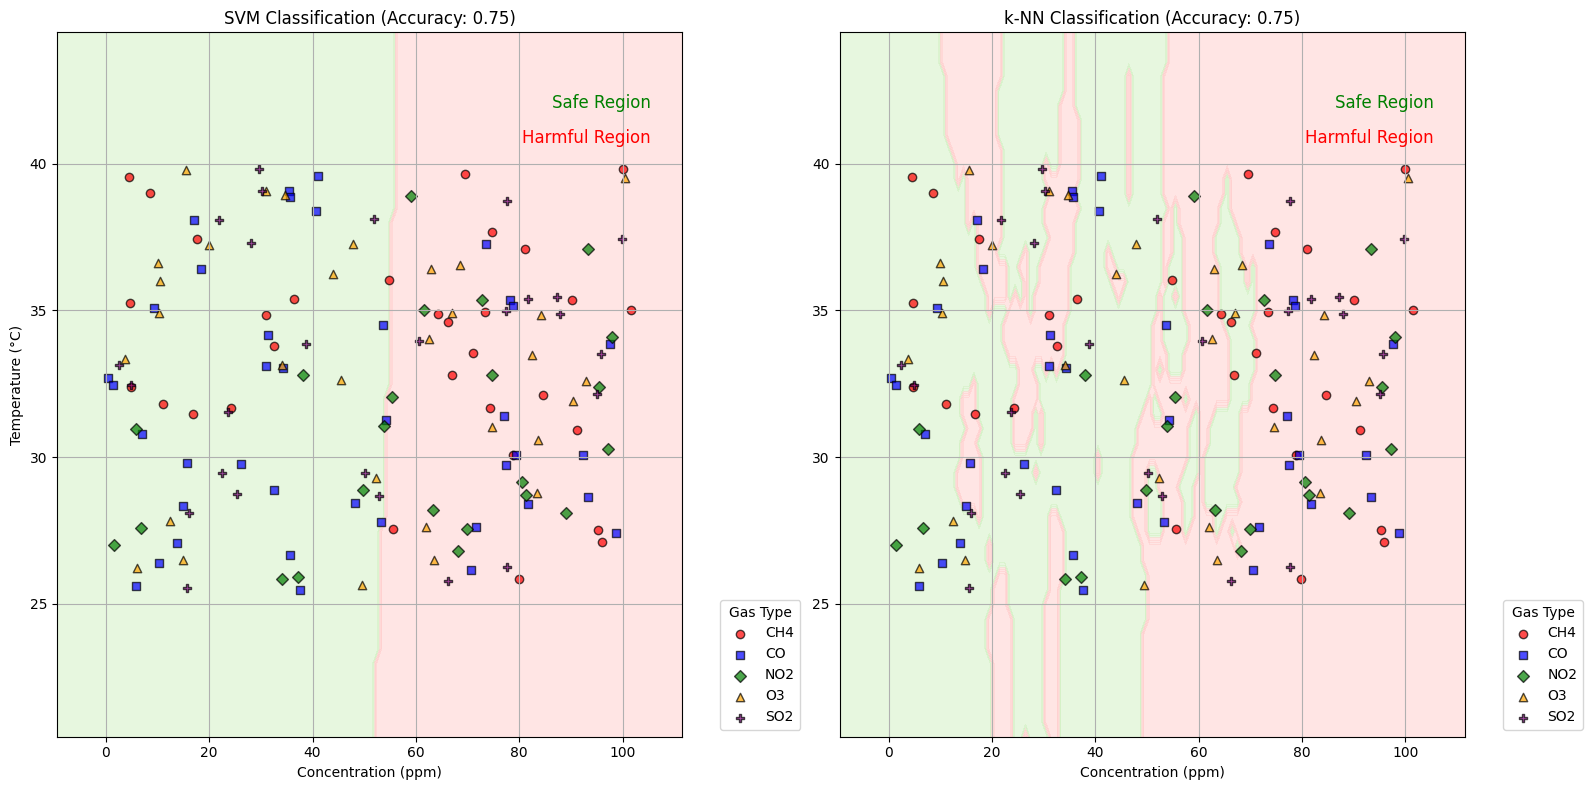

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Step 1: Defined dataset for 5 gases and their thresholds
np.random.seed(42)
gases_info = {
    'CO': 9,    # Threshold in ppm
    'NO2': 53,
    'SO2': 75,
    'CH4': 10,
    'O3': 70
}

samples_per_gas = 100
data, labels, gas_names = [], [], []

# Generating data for each gas
for gas, threshold in gases_info.items():
    concentration = np.random.uniform(low=0, high=100, size=samples_per_gas)  # Gas levels in ppm
    temperature = np.random.uniform(low=25, high=40, size=samples_per_gas)  # Temperature in °C
    humidity = np.random.uniform(low=50, high=90, size=samples_per_gas)  # Humidity in %
    noise = np.random.normal(scale=2, size=samples_per_gas)  # Sensor noise

    # Features and labels
    features = np.column_stack((concentration + noise, temperature, humidity))
    label = (concentration > threshold).astype(int)  # 0: Safe, 1: Harmful

    data.append(features)
    labels.append(label)
    gas_names.extend([gas] * samples_per_gas)

data = np.vstack(data)
labels = np.hstack(labels)
gas_names = np.array(gas_names)

# Step 2: Splitting data
X_train, X_test, y_train, y_test, gas_train, gas_test = train_test_split(data, labels, gas_names, test_size=0.3, random_state=42)

# Step 3: Training SVM and k-NN models
svm_model = SVC(kernel='rbf', C=1, probability=True)
svm_model.fit(X_train[:, :2], y_train)  # Using only concentration and temperature for 2D visualization

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train[:, :2], y_train)  # Using only concentration and temperature

# Step 4: Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Generated a meshgrid for decision regions
x_min, x_max = X_test[:, 0].min() - 10, X_test[:, 0].max() + 10  # Concentration
y_min, y_max = X_test[:, 1].min() - 5, X_test[:, 1].max() + 5  # Temperature
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.5))

# Created a colormap for decision regions
region_cmap = ListedColormap(['#d0f0c0', '#ffcccb'])  # Light green for safe, pink for harmful

# Plotting SVM decision regions
Z_svm = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
axes[0].contourf(xx, yy, Z_svm, cmap=region_cmap, alpha=0.5)

# Plotting k-NN decision regions
Z_knn = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
axes[1].contourf(xx, yy, Z_knn, cmap=region_cmap, alpha=0.5)

# Gas-Specific Scatter Plots
unique_gases = np.unique(gas_test)
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 's', 'D', '^', 'P']
gas_color_map = {gas: (color, marker) for gas, color, marker in zip(unique_gases, colors, markers)}

# Plotting SVM data points
for gas in unique_gases:
    mask = gas_test == s
    color, marker = gas_color_map[gas]
    axes[0].scatter(X_test[mask, 0], X_test[mask, 1], c=color, marker=marker, label=gas, edgecolor='k', alpha=0.7)

axes[0].set_title(f"SVM Classification (Accuracy: {accuracy_score(y_test, svm_model.predict(X_test[:, :2])):.2f})")
axes[0].set_xlabel('Concentration (ppm)')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(True)

# Plotting k-NN data points
for gas in unique_gases:
    mask = gas_test == gas
    color, marker = gas_color_map[gas]
    axes[1].scatter(X_test[mask, 0], X_test[mask, 1], c=color, marker=marker, label=gas, edgecolor='k', alpha=0.7)

axes[1].set_title(f"k-NN Classification (Accuracy: {accuracy_score(y_test, knn_model.predict(X_test[:, :2])):.2f})")
axes[1].set_xlabel('Concentration (ppm)')
axes[1].grid(True)

# Added safe and harmful regions legend
handles = [plt.Line2D([0], [0], color='#d0f0c0', lw=5, label='Safe Region'),
           plt.Line2D([0], [0], color='#ffcccb', lw=5, label='Harmful Region')]
axes[0].legend(handles=handles, loc='upper left', title="Regions", bbox_to_anchor=(1, 1))
axes[1].legend(handles=handles, loc='upper left', title="Regions", bbox_to_anchor=(1, 1))

# Added gas type legend to both plots
axes[0].legend(title="Gas Type", loc='lower left', bbox_to_anchor=(1.05, 0), labels=unique_gases)
axes[1].legend(title="Gas Type", loc='lower left', bbox_to_anchor=(1.05, 0), labels=unique_gases)

# Additional text labels for the regions
axes[0].text(0.95, 0.9, 'Safe Region', transform=axes[0].transAxes, fontsize=12, color='green', ha='right', va='center')
axes[0].text(0.95, 0.85, 'Harmful Region', transform=axes[0].transAxes, fontsize=12, color='red', ha='right', va='center')

axes[1].text(0.95, 0.9, 'Safe Region', transform=axes[1].transAxes, fontsize=12, color='green', ha='right', va='center')
axes[1].text(0.95, 0.85, 'Harmful Region', transform=axes[1].transAxes, fontsize=12, color='red', ha='right', va='center')

plt.tight_layout()
plt.show()
